## ***Arbitrary Value Imputation***
It consists of replacing missing values with arbitrary values. For categorical - 'missing' and for numerical - 999. This imputation technique should be used when data is **Missing Data Not At Random** (MNAR). </br>
It works well with tree based algorithms but not with linear regression or logistic regression based algorithms.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

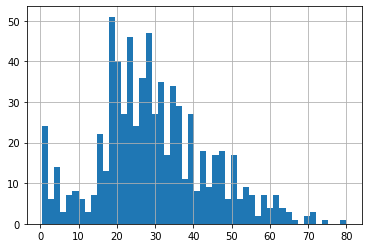

In [4]:
data.Age.hist(bins=50)

Here we can see that the range of age is around 0 to 80. So our arbitrary value should be less than 0 or greater than 80. Ideally we want to look for a value that is at the end of the distribution. In our case for example 100.

In [6]:
# Let's create our impute function
def impute_nan(data,variable,method):
    if method == 'mean':
        mean = data[variable].mean()
        data[variable] = data[variable].fillna(mean)
    elif method == 'median':
        median = data[variable].median()
        data[variable] = data[variable].fillna(median)
    elif method == 'mode':
        mode = data[variable].mode()
        data[variable] = data[variable].fillna(mode)
    elif method == 'random':
        data[variable+'_'+method] = data[variable]
        random_sample = data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
        random_sample.index = data[data[variable].isnull()].index
        data.loc[random_sample.index,variable+'_'+method] = random_sample
    elif method == 'end_distribution':
        data[variable+'_'+method] = data[variable].fillna(data[variable].mean()+3*data[variable].std())
    elif method == 'arbitrary':
        data[variable+'_'+method+'_hundred'] = data[variable].fillna(100)
        data[variable+'_'+method+'_zero'] = data[variable].fillna(0)

In [7]:
impute_nan(data,'Age','arbitrary')

In [8]:
data.head()

,Survived,Age,Fare,Age_arbitrary_hundred,Age_arbitrary_zero
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

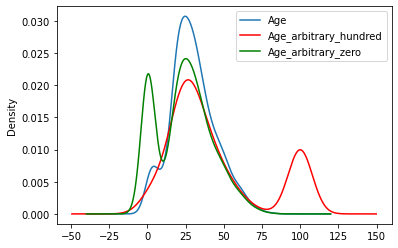

In [10]:
# Let's plot the newly created features to see their distribution
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax,label='Age')
data.Age_arbitrary_hundred.plot(kind='kde',ax=ax,label='Age_arbitrary_hundred',color='red')
data.Age_arbitrary_zero.plot(kind='kde',ax=ax,label='Age_arbitrary_zero',color='green')
lines, lables = ax.get_legend_handles_labels()
ax.legend(lines, lables)

From the above graph, we can see that there is so much distortion in the distribution.

### **Advantages and Disadvantages of Arbitrary Value Imputation**

***Advantages***
1. Easy to implement
2. Fast way of obtaining complete datasets
3. Can be integrated into production (during model development)
4. Captures the importance of missingness

***Disadvantages***
1. Distortion of the original distribution
2. Distortion of original variance
3. If the arbitrary value is at the end of the distribution it may mask or create outliers.
4. Hard to decide which value to use

# **Handling Categorical Missing Values**

## ***Frequent Category Imputation***
Also known as Mode Imputation. It consists of replacing all missing values (NA) within a variable by the mode, which in other words refers to the most frequent value or most frequent category. </br>

This imputation is used:
1.  when data is **Missing Completely At Random** (MCAR).
2. Not more than 5% of the variable contains missing data.

In [13]:
data = pd.read_csv('Advanced_HousePrice.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [14]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [17]:
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [16]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

Here we can see that, we can apply frequent category imputation on the variable ***BsmtQual*** and ***GarageType*** because their missing percentage is less than 5% but we cannot apply this technique on ***FireplaceQu*** variable because it has missing percentage greater than 5%.

In [27]:
# Compute the frequency with every feature
data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

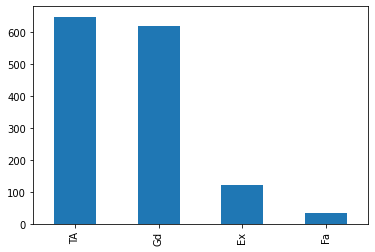

In [28]:
data.BsmtQual.value_counts().sort_values(ascending=False).plot(kind='bar')

In [29]:
data.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:>

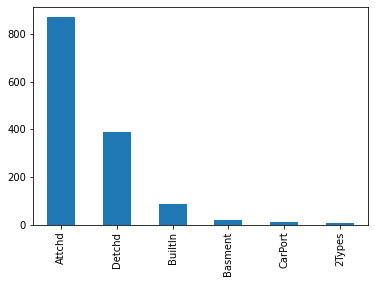

In [30]:
data.GarageType.value_counts().sort_values(ascending=False).plot(kind='bar')

In [31]:
data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:>

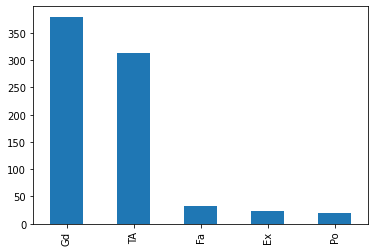

In [32]:
data.FireplaceQu.value_counts().sort_values(ascending=False).plot(kind='bar')

In [36]:
# Let's create our impute function
def impute_nan(data,variable,method):
    if method == 'most_freq':
        data[variable+"_"+method] = data[variable].fillna(data[variable].value_counts().index[0])

In [37]:
impute_nan(data,'BsmtQual','most_freq')
impute_nan(data,'GarageType','most_freq')

In [38]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_most_freq,GarageType_most_freq
0,Gd,NaN,Attchd,208500,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,Attchd
2,Gd,TA,Attchd,223500,Gd,Attchd
3,TA,Gd,Detchd,140000,TA,Detchd
4,Gd,TA,Attchd,250000,Gd,Attchd


In [42]:
for variable in ['BsmtQual_most_freq','GarageType_most_freq']:
    print(data[variable].isnull().mean())

0.0
0.0


In [44]:
# Apart from the above implementation, we can also use the following methods to get the most frequent value
print(data.GarageType.mode())
print(data.GarageType.mode()[0])

0    Attchd
dtype: object
Attchd


### **Advantages and Disadvantage of Frequent Category Imputation**

***Advantages:***
1. It is easy to implement
2. It is the fast way to obtain complete datasets

***Disadvantages:***
1. It distorts the relation of the most frequent label with other variables within the dataset
2. It may lead to an over-representation of the most frequent label if there is a big number of NA
3. Only applied to the variables with less than 5% missing data

## ***Adding a variable to capture NAN***
It capture the importance of missingness with the help of a new variable.

***We can use this technique on the **FireplaceQu** variable***

In [57]:
data = pd.read_csv('Advanced_HousePrice.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [58]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [59]:
data['FireplaceQu_nan'] = np.where(data.FireplaceQu.isnull(),1, 0)

In [60]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_nan
0,Gd,NaN,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


Now as we created new feature i.e. ***BsmtQual_nan***, we can apply frequent category imputation on the original variable while ***BsmtQual_nan*** captures the importance of missingness where 0 represent that value was not missing and 1 represent value was missing originally.

In [65]:
print(data.FireplaceQu.mode())
print("="*50)
print(data.FireplaceQu.value_counts().sort_values(ascending=False))

0    Gd
dtype: object
Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64


In [61]:
data.FireplaceQu.fillna(data.FireplaceQu.mode()[0],inplace=True)

In [62]:
data.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_nan
0,Gd,Gd,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,Gd,Attchd,143000,1
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


### **Advantages and Disadvantages of Adding a variable to capture NAN**

***Advantages:***
1. Can be used when we have large number of missing values in the variable.

***Disadvantages:***
1. It will increase the feature space.

## ***Replacing NAN with a new Category***
***Most Frequent and common technique used these days***

Suppose if we have more frequent categories, we just replace the NAN with a new category. </br>
Here we consider that all the NANs of a variable belongs to the same category which is not mentioned in the dataset. Therefore, we create this new category by our own.

In [66]:
data = pd.read_csv('Advanced_HousePrice.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [67]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [68]:
# Let's create our impute function
def impute_nan(data,variable):
    data[variable+"_newVar"] = np.where(data[variable].isnull(),"Missing",data[variable]) # We can also use data[variable].fillna("Missing") and here data[variable] in the np.where() function is used to set the values of non-missing values to the same as they are in original vairable.

In [69]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(data,feature)

In [72]:
data.head(6)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newVar,FireplaceQu_newVar,GarageType_newVar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Missing,Attchd


After this we can drop the original features.

In [73]:
data.drop(['FireplaceQu','BsmtQual','GarageType'], axis=1, inplace=True)

In [74]:
data.head(6)

,SalePrice,BsmtQual_newVar,FireplaceQu_newVar,GarageType_newVar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
5,143000,Gd,Missing,Attchd
